In [2]:
#import libraries
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import pandas as pd

In [33]:
# H1B Salary Database 
df=pd.read_csv('merged_h1b_data.csv')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55954 entries, 0 to 55953
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Employer     55954 non-null  object
 1   Job Title    55954 non-null  object
 2   Base Salary  55954 non-null  object
 3   Location     55954 non-null  object
dtypes: object(4)
memory usage: 1.7+ MB


In [35]:
df.head()

Employer         Job Title Base Salary      Location
0  BTI SOLUTIONS INC  NETWORK ENGINEER      56,000  PLYMOUTH, MI
1  BTI SOLUTIONS INC  NETWORK ENGINEER      56,000     PLANO, TX
2  BTI SOLUTIONS INC  NETWORK ENGINEER      57,320     PLANO, TX
3  BTI SOLUTIONS INC  NETWORK ENGINEER      58,480  BELLEVUE, WA
4  BTI SOLUTIONS INC  NETWORK ENGINEER      62,000  BELLEVUE, WA

In [36]:
#for mapping cities
lat_lon=pd.read_excel('uscities.xlsx')

In [37]:

df['Job Title'] = df['Job Title'].str.title()

In [38]:
df['Job Title'].value_counts()

Software Engineer            42028
Data Engineer                 4004
Data Scientist                3128
Business Analyst              2496
Data Analyst                  2002
Network Engineer              1102
Qa Engineer                    454
Cyber Security Engineer        420
Machine Learning Engineer      320
Name: Job Title, dtype: int64

In [39]:
# Remove commas and convert 'Base Salary' to float
df['Base Salary'] = df['Base Salary'].str.replace(',', '').astype(float)

In [41]:
def categorize_job_category(job_title):
    data_science_keywords = ['Data Scientist', 'Data Engineer', 'Data Analyst', 'Business Analyst', 'Machine Learning Engineer']
    computer_science_keywords = ['Software Engineer', 'Network Engineer', 'Cyber Security Engineer', 'Qa Engineer']

    for keyword in data_science_keywords:
        if keyword in job_title:
            return 'Data Science'

    for keyword in computer_science_keywords:
        if keyword in job_title:
            return 'Computer Science'

    # If the job title doesn't match any predefined categories
    return 'Other'

# Apply the function to create the 'Category' column
df['Category'] = df['Job Title'].apply(categorize_job_category)


In [42]:
df['Category'].value_counts()

Computer Science    44004
Data Science        11950
Name: Category, dtype: int64

# It is highly imbalance. 

In [43]:
sample_size = 10000

# Filter rows with job title 'Software Engineer'
software_engineer_rows = df[df['Job Title'] == 'Software Engineer']

# Exclude 'Software Engineer' rows from the original DataFrame
df_without_software_engineer = df[df['Job Title'] != 'Software Engineer']

# Randomly sample 'Software Engineer' job titles while preserving max and min values
software_engineer_subset = software_engineer_rows.sample(n=sample_size-2, random_state=42)

# Concatenate the subset back to the original DataFrame
df_final = pd.concat([df_without_software_engineer, software_engineer_subset])


In [44]:
df_final['Category'].value_counts()

Computer Science    11974
Data Science        11950
Name: Category, dtype: int64

I have 9 Jobs titles : 
Data Scientist, Data Engineer, Data Analyst, Buisness Analyst, Machine Learning Engineer, 
Software Engineer, Network Enginner, Cyber Security, QA Engineer

And mainly as u can observe two categories Data Science jobs vs Computer Science jobs

I have collected data from H1b salary for these .. I  have Employer names, Job Title (9 titles), Base Salary (like 56,000), Location (like PLANO, TX)

WHat possible graphs can i make to compare salaries.

1. I want to first see the distribution of  Data Science jobs vs Computer Science jobs salaries. (use drop down option to choose between two categories)


# Salary Distribution

In [45]:
ds_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11950 entries, 551 to 55953
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Employer     11950 non-null  object 
 1   Job Title    11950 non-null  object 
 2   Base Salary  11950 non-null  float64
 3   Location     11950 non-null  object 
 4   Category     11950 non-null  object 
dtypes: float64(1), object(4)
memory usage: 560.2+ KB


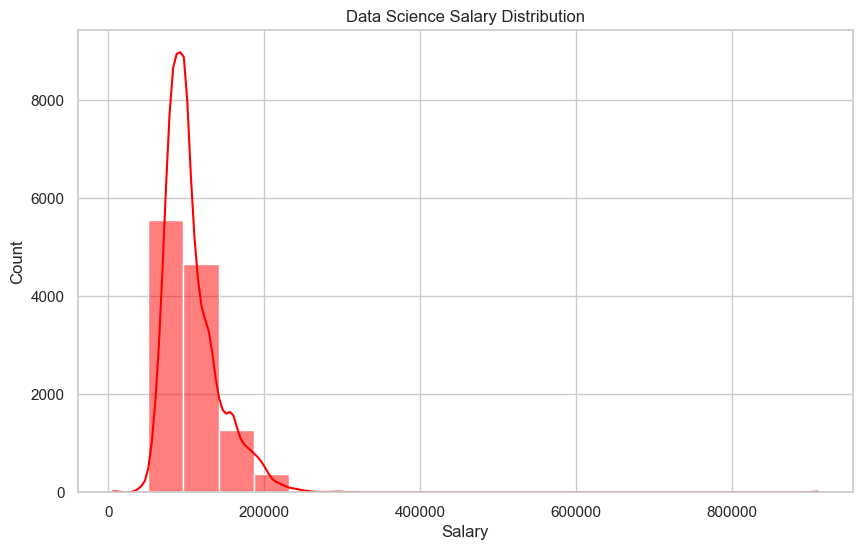

In [46]:
# Filter Data Science category
ds_data = df_final[df_final['Category'] == 'Data Science']

# Set the style
sns.set(style="whitegrid")

# Create a histogram using Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(ds_data['Base Salary'], bins=20, color='red', kde=True)
plt.title('Data Science Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Count')

# Show the histogram
plt.show()

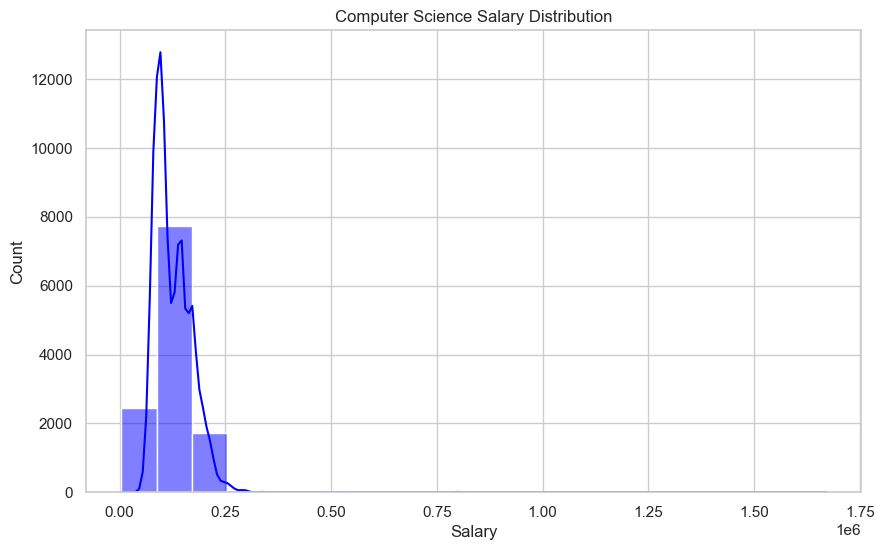

In [65]:
# Filter Data Science category
cs_data = df_final[df_final['Category'] == 'Computer Science']

# Set the style
sns.set(style="whitegrid")

# Create a histogram using Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(cs_data['Base Salary'], bins=20, color='blue', kde=True)
plt.title('Computer Science Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Count')

# Show the histogram
plt.show()

In [48]:
df_final.to_csv('salary_data.csv',index=False)

In [58]:
category_color_map = {'Computer Science': 'red', 'Data Science': 'blue'}

# Create the box plot
fig = px.box(df_final, x="Category", y="Base Salary", 
             color="Category", color_discrete_map=category_color_map).update_layout(title_text="Summary Statistics for DS VS CS")

# Show the figure
fig.show()

In [50]:

fig = px.box(data_frame=df, x='Job Title', y='Base Salary', color='Category',
             labels={'Base Salary': 'Salary'},
             title='Salary Distribution: Data Science vs Computer Science Jobs',
             category_orders={'Job Title': ['Data Scientist', 'Data Engineer', 'Data Analyst', 'Business Analyst', 'Machine Learning Engineer', 'Software Engineer', 'Network Engineer', 'Cyber Security Engineer', 'Qa Engineer']},
             )

# Show the figure
fig.show()

## Let's cherry pick the data as we don't want SE roles to dominate

In [51]:
df_final_filtered = df_final[df_final['Base Salary'] <= 500000]

## Map lat and long in the data

In [52]:
df_final_filtered['city'] = df_final_filtered['Location'].apply(lambda x: x.split(', ')[0].title())
df_final_filtered['state'] = df_final_filtered['Location'].apply(lambda x: x.split(', ')[1])

/var/folders/v2/mhcwpy5j5kn_3112583wbmm80000gn/T/ipykernel_6284/3155289853.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/v2/mhcwpy5j5kn_3112583wbmm80000gn/T/ipykernel_6284/3155289853.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [53]:
df_final_filtered.head(1)

Employer         Job Title  Base Salary      Location  \
0  BTI SOLUTIONS INC  Network Engineer      56000.0  PLYMOUTH, MI   

           Category      city state  
0  Computer Science  Plymouth    MI

In [54]:
df_map= pd.merge(df_final_filtered, lat_lon, left_on=['city', 'state'], 
              right_on=['city', 'state_id'])

In [55]:
df_map = df_map[['Employer','Job Title','Base Salary','Category','city', 'state_id','state_name','lat', 'lng']]


In [56]:
df_map.head(1)

Employer         Job Title  Base Salary          Category  \
0  BTI SOLUTIONS INC  Network Engineer      56000.0  Computer Science   

       city state_id state_name      lat     lng  
0  Plymouth       MI   Michigan  42.3718 -83.468

In [19]:
df_map.to_csv('map_data.csv',index=False)

In [57]:
df_state_avg = df_map.groupby("state_id")["Base Salary"].mean().reset_index()

# Create choropleth map
fig = px.choropleth(df_state_avg, 
                    locations="state_id", 
                    locationmode="USA-states",
                    color="Base Salary", 
                    color_continuous_scale='YlOrRd',
                    scope="usa").update_layout(title_text="Average Salary by U.S. State")
                  
fig.show()

In [129]:
df = df_map[df_map['Category']=='Data Science']

# Average salary per city 
df_city_avg = df.groupby("city")["Base Salary"].mean().reset_index()
df_city_avg = df_city_avg.merge(df[['city','lat','lng']], on='city')


# Create choropleth map 
fig = px.scatter_mapbox(df_city_avg, lat="lat", lon="lng",
                        size="Base Salary", 
                        hover_name="city",
                        hover_data=["Base Salary"],
                        color_continuous_scale='YlOrRd', 
                        zoom=3)
                        
fig.update_layout(mapbox_style="open-street-map", 
                  margin={"r":0,"t":0,"l":0,"b":0})
                  
fig.show()

In [62]:
df = df_map[df_map['Category'] == 'Data Science']

# Create heatmap
fig = px.density_mapbox(df, 
                        lat='lat', 
                        lon='lng', 
                        z='Base Salary', 
                        radius=10,
                        center=dict(lat=df['lat'].mean(), lon=df['lng'].mean()),  # Set map center
                        zoom=3,
                        animation_frame="Job Title", 
                        mapbox_style="open-street-map").update_layout(title_text='Density distribution of salaries based on Job roles (City-view)',margin={"r":1,"t":50,"l":0,"b":0})

fig.show()

In [64]:
df_ds = df_map[df_map['Category']=='Data Science']

# Compute quartile thresholds
sal_min = df_ds["Base Salary"].min()
sal_25 = df_ds["Base Salary"].quantile(0.25)
sal_50 = df_ds["Base Salary"].quantile(0.50)
sal_75 = df_ds["Base Salary"].quantile(0.75)
sal_max = df_ds["Base Salary"].max()

limits=[(sal_min,sal_25),(sal_25,sal_50),(sal_50,sal_75),(sal_75,sal_max)]

colors = ["royalblue","crimson","lightseagreen","orange","lightgrey"]

fig = go.Figure()

for i in range(len(limits)):
    lim = limits[i]
    
    df_sub = df_ds[(df_ds['Base Salary'] >= lim[0]) & (df['Base Salary'] < lim[1])]
    fig.add_trace(go.Scattergeo(
        locationmode = 'USA-states', 
        lon = df_sub['lng'],
        lat = df_sub['lat'],
        text = df_sub['Job Title'],
        marker = dict(
            size = df_ds['Base Salary']/15000, 
            color = colors[i]),
        
        name = '{0} - {1}'.format(lim[0],lim[1])
    ))

fig.update_layout(
    title_text = 'How salary ranges in different cities',
    showlegend = True,
    geo = dict(
        scope = 'usa',
        landcolor = 'rgb(217, 217, 217)'
    )
)
fig.update_layout(margin={"r":1,"t":50,"l":0,"b":0})

fig.show()

In [148]:

# Top 10 employers by count
top_employers_count = df_ds.groupby('Employer').count().sort_values('Job Title', ascending=False).head(10).reset_index()

# Get mean salary for each top employer
top_employers_salary = df_ds.groupby('Employer')['Base Salary'].mean().reset_index(name='Avg Salary')

# Merge the count and mean salary DataFrames
top_employers = pd.merge(top_employers_count, top_employers_salary, on='Employer')

# Sort the DataFrame by average salary in descending order
top_employers = top_employers.sort_values(by='Avg Salary', ascending=False)

# Plot
fig = px.bar(top_employers, 
             x='Avg Salary', 
             y='Employer', 
             orientation='h',
             text=top_employers['Avg Salary'].apply(lambda x: f"${x:.2f}"),
             title='Top 10 Data Science Employers by Salary',
             labels={'Avg Salary': 'Average Salary'},
             height=500)

fig.update_layout(xaxis_title='Average Salary', yaxis_title='Employers', showlegend=False)
fig.show()
